# Busan arts enjoyment index

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
# 예술 지수 구성 지표 중 예술 향유 지수 table 생성
# 예술 향유지수 = 평균(향유지수, 참여지수)
# 데이터는 소수점 셋째 자리에서 반올림함

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 계산을 위한 데이터 불러오기
data = pd.read_csv('./busan_arts_enjoyment_index_calculate.csv')
df = pd.DataFrame(data)
districts = df.iloc[:, 0]
districts

0      강서구
1      금정구
2      기장군
3       남구
4       동구
5      동래구
6     부산진구
7       북구
8      사상구
9      사하구
10      서구
11     수영구
12     연제구
13     영도구
14      중구
15    해운대구
Name: 구, dtype: object

In [4]:
# 전체 예술 향유지수 데이터 프레임 생성
Arts_enjoyment_index = pd.DataFrame(districts)
Arts_enjoyment_index

,구
0,강서구
1,금정구
2,기장군
3,남구
4,동구
5,동래구
6,부산진구
7,북구
8,사상구
9,사하구


# 문화예술 관람률

In [5]:
df

,구,audience_rate,visit_num,expenditure,reading,library,volunteer,club,education
0,강서구,19.3,4.1,1.0,44.8,12.8,9.0,1.8,11.4
1,금정구,25.4,4.1,0.7,44.8,12.8,10.4,1.8,11.4
2,기장군,26.7,4.1,1.4,44.8,12.8,10.3,1.8,11.4
3,남구,26.4,4.1,1.2,44.8,12.8,9.2,1.8,11.4
4,동구,23.8,4.1,0.4,44.8,12.8,7.1,1.8,11.4
5,동래구,29.0,4.1,2.4,44.8,12.8,12.5,1.8,11.4
6,부산진구,29.4,4.1,1.2,44.8,12.8,10.4,1.8,11.4
7,북구,18.4,4.1,0.9,44.8,12.8,8.3,1.8,11.4
8,사상구,23.7,4.1,0.9,44.8,12.8,9.6,1.8,11.4
9,사하구,33.3,4.1,1.4,44.8,12.8,8.1,1.8,11.4


In [6]:
# Audience rate = 100*(Audience_rate/Avg_audience_rate)
Avg_audience_rate = df['audience_rate'].mean()
Avg_audience_rate

26.5

In [7]:
Arts_enjoyment_index['audience_rate'] = 100*(df['audience_rate']/Avg_audience_rate)
Arts_enjoyment_index['audience_rate'] = Arts_enjoyment_index['audience_rate'].round(2)
Arts_enjoyment_index

,구,audience_rate
0,강서구,72.83
1,금정구,95.85
2,기장군,100.75
3,남구,99.62
4,동구,89.81
5,동래구,109.43
6,부산진구,110.94
7,북구,69.43
8,사상구,89.43
9,사하구,125.66


# 문화예술 관람 횟수

In [8]:
# Visit num = 100*(Visit_num/Avg_visit_num)
Avg_visit_num = df['visit_num'].mean()
Avg_visit_num

4.1

In [9]:
Arts_enjoyment_index['visit_num'] = 100*(df['visit_num']/Avg_visit_num)
Arts_enjoyment_index

,구,audience_rate,visit_num
0,강서구,72.83,100.0
1,금정구,95.85,100.0
2,기장군,100.75,100.0
3,남구,99.62,100.0
4,동구,89.81,100.0
5,동래구,109.43,100.0
6,부산진구,110.94,100.0
7,북구,69.43,100.0
8,사상구,89.43,100.0
9,사하구,125.66,100.0


# 가구당 문화여가비 비중

In [10]:
# Expenditure = 100*(Expenditure/Avg_expenditure)
Avg_expenditure = df['expenditure'].mean()
Avg_expenditure

1.1124999999999998

In [11]:
Arts_enjoyment_index['expenditure'] = 100*(df['expenditure']/Avg_visit_num)
Arts_enjoyment_index['expenditure'] = Arts_enjoyment_index['expenditure'].round(2)
Arts_enjoyment_index

,구,audience_rate,visit_num,expenditure
0,강서구,72.83,100.0,24.39
1,금정구,95.85,100.0,17.07
2,기장군,100.75,100.0,34.15
3,남구,99.62,100.0,29.27
4,동구,89.81,100.0,9.76
5,동래구,109.43,100.0,58.54
6,부산진구,110.94,100.0,29.27
7,북구,69.43,100.0,21.95
8,사상구,89.43,100.0,21.95
9,사하구,125.66,100.0,34.15


# 독서율 및 도서관 이용률

In [12]:
# Reading = 100*[avg{((Reading)/(Avg_reading),((Library)/(Avg_library)}]
Avg_reading = df['reading'].mean()
Avg_library = df['library'].mean()
print(Avg_reading)
print(Avg_library)

44.8
12.8


In [13]:
Arts_enjoyment_index['reading'] = 100*(((df['reading']/Avg_reading)+(df['library']/Avg_library))/2)
Arts_enjoyment_index

,구,audience_rate,visit_num,expenditure,reading
0,강서구,72.83,100.0,24.39,100.0
1,금정구,95.85,100.0,17.07,100.0
2,기장군,100.75,100.0,34.15,100.0
3,남구,99.62,100.0,29.27,100.0
4,동구,89.81,100.0,9.76,100.0
5,동래구,109.43,100.0,58.54,100.0
6,부산진구,110.94,100.0,29.27,100.0
7,북구,69.43,100.0,21.95,100.0
8,사상구,89.43,100.0,21.95,100.0
9,사하구,125.66,100.0,34.15,100.0


# 문화예술 자원봉사 경험률

In [14]:
# Volunteer = 100*(Volunteer/Avg_volunteer)
Avg_volunteer = df['volunteer'].mean()
Avg_volunteer

9.56875

In [15]:
Arts_enjoyment_index['volunteer'] = 100*(df['volunteer']/Avg_volunteer)
Arts_enjoyment_index['volunteer'] = Arts_enjoyment_index['volunteer'].round(2)
Arts_enjoyment_index

,구,audience_rate,visit_num,expenditure,reading,volunteer
0,강서구,72.83,100.0,24.39,100.0,94.06
1,금정구,95.85,100.0,17.07,100.0,108.69
2,기장군,100.75,100.0,34.15,100.0,107.64
3,남구,99.62,100.0,29.27,100.0,96.15
4,동구,89.81,100.0,9.76,100.0,74.20
5,동래구,109.43,100.0,58.54,100.0,130.63
6,부산진구,110.94,100.0,29.27,100.0,108.69
7,북구,69.43,100.0,21.95,100.0,86.74
8,사상구,89.43,100.0,21.95,100.0,100.33
9,사하구,125.66,100.0,34.15,100.0,84.65


# 문화예술 동호회 참여율

In [16]:
# Club = 100*(Club/Avg_club)
Avg_club = df['club'].mean()
Avg_club

1.8

In [17]:
Arts_enjoyment_index['club'] = 100*(df['club']/Avg_club)
Arts_enjoyment_index

,구,audience_rate,visit_num,expenditure,reading,volunteer,club
0,강서구,72.83,100.0,24.39,100.0,94.06,100.0
1,금정구,95.85,100.0,17.07,100.0,108.69,100.0
2,기장군,100.75,100.0,34.15,100.0,107.64,100.0
3,남구,99.62,100.0,29.27,100.0,96.15,100.0
4,동구,89.81,100.0,9.76,100.0,74.20,100.0
5,동래구,109.43,100.0,58.54,100.0,130.63,100.0
6,부산진구,110.94,100.0,29.27,100.0,108.69,100.0
7,북구,69.43,100.0,21.95,100.0,86.74,100.0
8,사상구,89.43,100.0,21.95,100.0,100.33,100.0
9,사하구,125.66,100.0,34.15,100.0,84.65,100.0


# 문화예술교육 경험률

In [18]:
# Education = 100*(Education/Avg_education)
Avg_education = df['education'].mean()
Avg_education

11.4

In [19]:
Arts_enjoyment_index['education'] = 100*(df['education']/Avg_education)
Arts_enjoyment_index

,구,audience_rate,visit_num,expenditure,reading,volunteer,club,education
0,강서구,72.83,100.0,24.39,100.0,94.06,100.0,100.0
1,금정구,95.85,100.0,17.07,100.0,108.69,100.0,100.0
2,기장군,100.75,100.0,34.15,100.0,107.64,100.0,100.0
3,남구,99.62,100.0,29.27,100.0,96.15,100.0,100.0
4,동구,89.81,100.0,9.76,100.0,74.20,100.0,100.0
5,동래구,109.43,100.0,58.54,100.0,130.63,100.0,100.0
6,부산진구,110.94,100.0,29.27,100.0,108.69,100.0,100.0
7,북구,69.43,100.0,21.95,100.0,86.74,100.0,100.0
8,사상구,89.43,100.0,21.95,100.0,100.33,100.0,100.0
9,사하구,125.66,100.0,34.15,100.0,84.65,100.0,100.0


# 세부지수 1. 향유지수

In [20]:
# avg(Audience_rate, Visit_num, Expenditure, Reading)
Arts_enjoyment_index['enjoyment_index'] = Arts_enjoyment_index['audience_rate']+Arts_enjoyment_index['visit_num']+Arts_enjoyment_index['expenditure']+Arts_enjoyment_index['reading']
Arts_enjoyment_index['enjoyment_index'] = Arts_enjoyment_index['enjoyment_index']/4
Arts_enjoyment_index['enjoyment_index'] = Arts_enjoyment_index['enjoyment_index'].round(2)
Arts_enjoyment_index

,구,audience_rate,visit_num,expenditure,reading,volunteer,club,education,enjoyment_index
0,강서구,72.83,100.0,24.39,100.0,94.06,100.0,100.0,74.30
1,금정구,95.85,100.0,17.07,100.0,108.69,100.0,100.0,78.23
2,기장군,100.75,100.0,34.15,100.0,107.64,100.0,100.0,83.72
3,남구,99.62,100.0,29.27,100.0,96.15,100.0,100.0,82.22
4,동구,89.81,100.0,9.76,100.0,74.20,100.0,100.0,74.89
5,동래구,109.43,100.0,58.54,100.0,130.63,100.0,100.0,91.99
6,부산진구,110.94,100.0,29.27,100.0,108.69,100.0,100.0,85.05
7,북구,69.43,100.0,21.95,100.0,86.74,100.0,100.0,72.84
8,사상구,89.43,100.0,21.95,100.0,100.33,100.0,100.0,77.84
9,사하구,125.66,100.0,34.15,100.0,84.65,100.0,100.0,89.95


# 세부지수 2. 참여지수

In [21]:
# avg(Volunteer, Club, Education)
Arts_enjoyment_index['participation_index'] = Arts_enjoyment_index['volunteer']+Arts_enjoyment_index['club']+Arts_enjoyment_index['education']
Arts_enjoyment_index['participation_index'] = Arts_enjoyment_index['participation_index']/3
Arts_enjoyment_index['participation_index'] = Arts_enjoyment_index['participation_index'].round(2)
Arts_enjoyment_index

,구,audience_rate,visit_num,expenditure,reading,volunteer,club,education,enjoyment_index,participation_index
0,강서구,72.83,100.0,24.39,100.0,94.06,100.0,100.0,74.30,98.02
1,금정구,95.85,100.0,17.07,100.0,108.69,100.0,100.0,78.23,102.90
2,기장군,100.75,100.0,34.15,100.0,107.64,100.0,100.0,83.72,102.55
3,남구,99.62,100.0,29.27,100.0,96.15,100.0,100.0,82.22,98.72
4,동구,89.81,100.0,9.76,100.0,74.20,100.0,100.0,74.89,91.40
5,동래구,109.43,100.0,58.54,100.0,130.63,100.0,100.0,91.99,110.21
6,부산진구,110.94,100.0,29.27,100.0,108.69,100.0,100.0,85.05,102.90
7,북구,69.43,100.0,21.95,100.0,86.74,100.0,100.0,72.84,95.58
8,사상구,89.43,100.0,21.95,100.0,100.33,100.0,100.0,77.84,100.11
9,사하구,125.66,100.0,34.15,100.0,84.65,100.0,100.0,89.95,94.88


# 최종 분야 지수 산출 - 예술향유지수
: Arts enjoyment index

In [22]:
# avg(Enjoyment_index, Participation_index)
Arts_enjoyment_index['busan_arts_enjoyment_index'] = Arts_enjoyment_index['enjoyment_index']+Arts_enjoyment_index['participation_index']
Arts_enjoyment_index['busan_arts_enjoyment_index'] = Arts_enjoyment_index['busan_arts_enjoyment_index']/2
Arts_enjoyment_index['busan_arts_enjoyment_index'] = Arts_enjoyment_index['busan_arts_enjoyment_index'].round(2)
Arts_enjoyment_index

,구,audience_rate,visit_num,expenditure,reading,volunteer,club,education,enjoyment_index,participation_index,busan_arts_enjoyment_index
0,강서구,72.83,100.0,24.39,100.0,94.06,100.0,100.0,74.30,98.02,86.16
1,금정구,95.85,100.0,17.07,100.0,108.69,100.0,100.0,78.23,102.90,90.56
2,기장군,100.75,100.0,34.15,100.0,107.64,100.0,100.0,83.72,102.55,93.14
3,남구,99.62,100.0,29.27,100.0,96.15,100.0,100.0,82.22,98.72,90.47
4,동구,89.81,100.0,9.76,100.0,74.20,100.0,100.0,74.89,91.40,83.15
5,동래구,109.43,100.0,58.54,100.0,130.63,100.0,100.0,91.99,110.21,101.10
6,부산진구,110.94,100.0,29.27,100.0,108.69,100.0,100.0,85.05,102.90,93.98
7,북구,69.43,100.0,21.95,100.0,86.74,100.0,100.0,72.84,95.58,84.21
8,사상구,89.43,100.0,21.95,100.0,100.33,100.0,100.0,77.84,100.11,88.98
9,사하구,125.66,100.0,34.15,100.0,84.65,100.0,100.0,89.95,94.88,92.42


In [23]:
Arts_enjoyment_index['audience_rate'].describe()

count     16.000000
mean      99.998750
std       18.819018
min       69.430000
25%       88.770000
50%       97.735000
75%      109.807500
max      134.720000
Name: audience_rate, dtype: float64

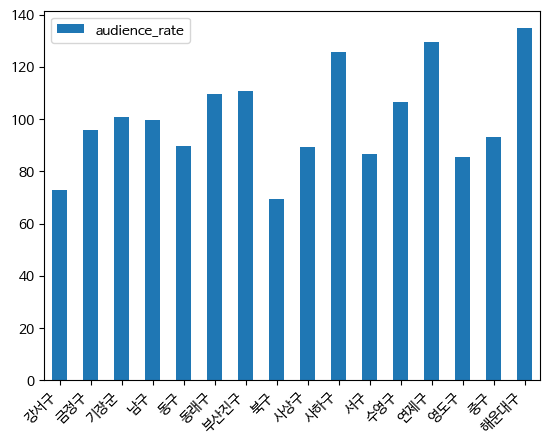

In [24]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['audience_rate'].plot(kind='bar')
plt.legend(['audience_rate'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [25]:
Arts_enjoyment_index['visit_num'].describe()

count     16.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: visit_num, dtype: float64

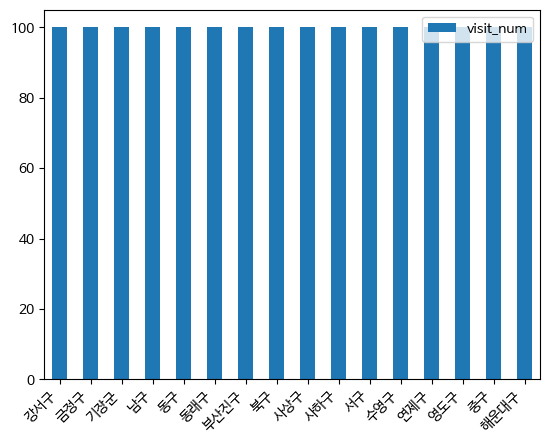

In [26]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['visit_num'].plot(kind='bar')
plt.legend(['visit_num'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [27]:
Arts_enjoyment_index['expenditure'].describe()

count    16.000000
mean     27.135000
std      11.120728
min       9.760000
25%      21.340000
50%      25.610000
75%      32.320000
max      58.540000
Name: expenditure, dtype: float64

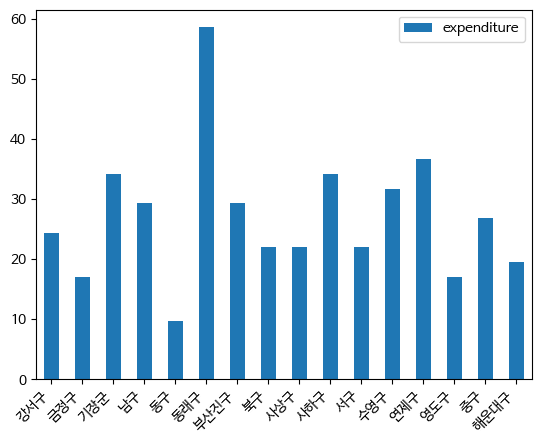

In [28]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['expenditure'].plot(kind='bar')
plt.legend(['expenditure'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [29]:
Arts_enjoyment_index['reading'].describe()

count     16.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: reading, dtype: float64

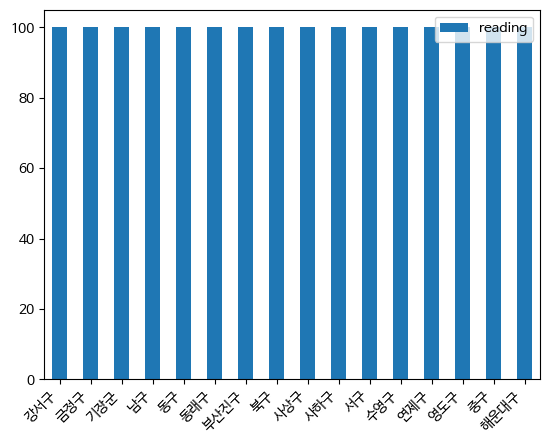

In [30]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['reading'].plot(kind='bar')
plt.legend(['reading'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [31]:
Arts_enjoyment_index['volunteer'].describe()

count     16.000000
mean     100.001250
std       19.203895
min       74.200000
25%       83.867500
50%       98.240000
75%      109.995000
max      135.860000
Name: volunteer, dtype: float64

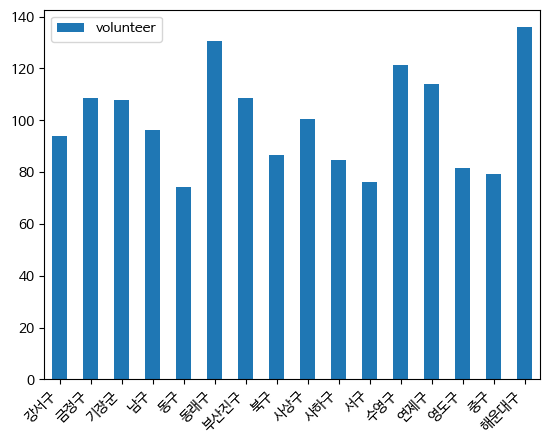

In [32]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['volunteer'].plot(kind='bar')
plt.legend(['volunteer'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [33]:
Arts_enjoyment_index['club'].describe()

count     16.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: club, dtype: float64

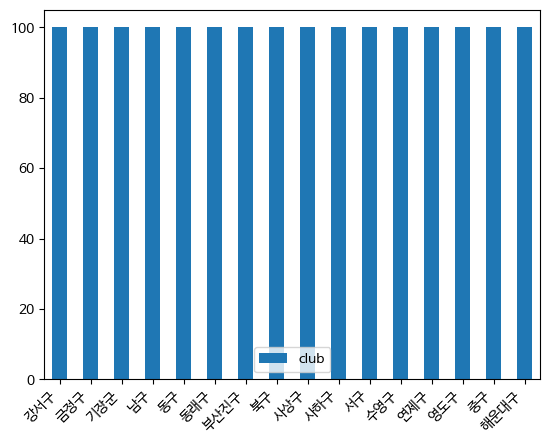

In [34]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['club'].plot(kind='bar')
plt.legend(['club'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [35]:
Arts_enjoyment_index['education'].describe()

count     16.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: education, dtype: float64

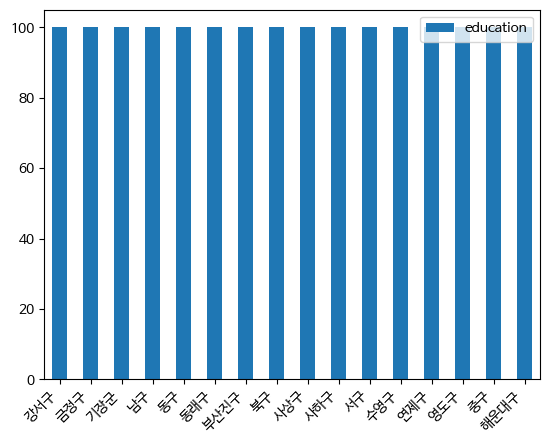

In [36]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['education'].plot(kind='bar')
plt.legend(['education'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [37]:
Arts_enjoyment_index['enjoyment_index'].describe()

count    16.000000
mean     81.780625
std       6.359389
min      72.840000
25%      76.805000
50%      81.115000
75%      85.927500
max      91.990000
Name: enjoyment_index, dtype: float64

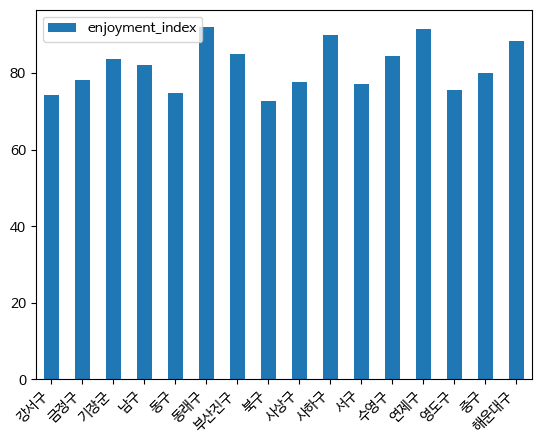

In [38]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['enjoyment_index'].plot(kind='bar')
plt.legend(['enjoyment_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [39]:
Arts_enjoyment_index['participation_index'].describe()

count     16.000000
mean     100.001250
std        6.401677
min       91.400000
25%       94.620000
50%       99.415000
75%      103.335000
max      111.950000
Name: participation_index, dtype: float64

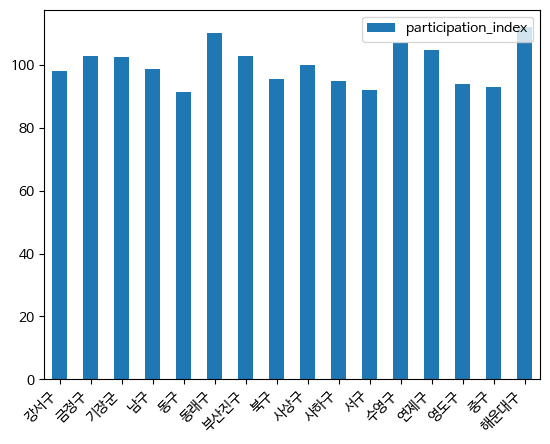

In [40]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['participation_index'].plot(kind='bar')
plt.legend(['participation_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [41]:
Arts_enjoyment_index['busan_arts_enjoyment_index'].describe()

count     16.000000
mean      90.892500
std        5.834979
min       83.150000
25%       85.810000
50%       90.515000
75%       94.435000
max      101.100000
Name: busan_arts_enjoyment_index, dtype: float64

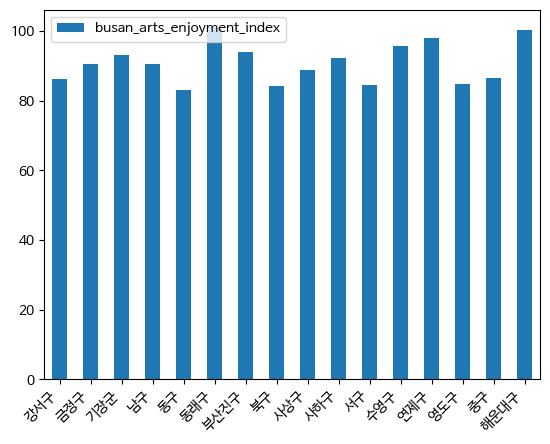

In [42]:
# 폰트 설정
plt.rcParams['font.family'] = 'NanumBarunGothic'

Arts_enjoyment_index['busan_arts_enjoyment_index'].plot(kind='bar')
plt.legend(['busan_arts_enjoyment_index'])

# x축에 구별 이름 추가
districts = ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
plt.xticks(range(len(districts)), districts, rotation=45, ha='right')

plt.show()

In [43]:
Arts_enjoyment_index.to_csv('busan_arts_enjoyment_index.csv', index=False)